# **Ход работы**

Импортируем необходимые библиотеки 

In [2]:
import os
import numpy as np
import pandas as pd

Считываем набор данных

In [3]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/data/notebook_files', 'train_l1.csv')
# Выводим первые строки для ознакомления с данными
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Загружаем полный набор данных и сохраняем его в переменные:

In [4]:
def load_dataset(label_dict):
    train_X = read_data('/data/notebook_files', 'train_l1.csv').values[:,:-2]
    train_y = read_data('/data/notebook_files', 'train_l1.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('/data/notebook_files', 'test_l1.csv').values[:,:-2]
    test_y = read_data('/data/notebook_files', 'test_l1.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

**Пробуем несколько моделей и выбираем лучшую**

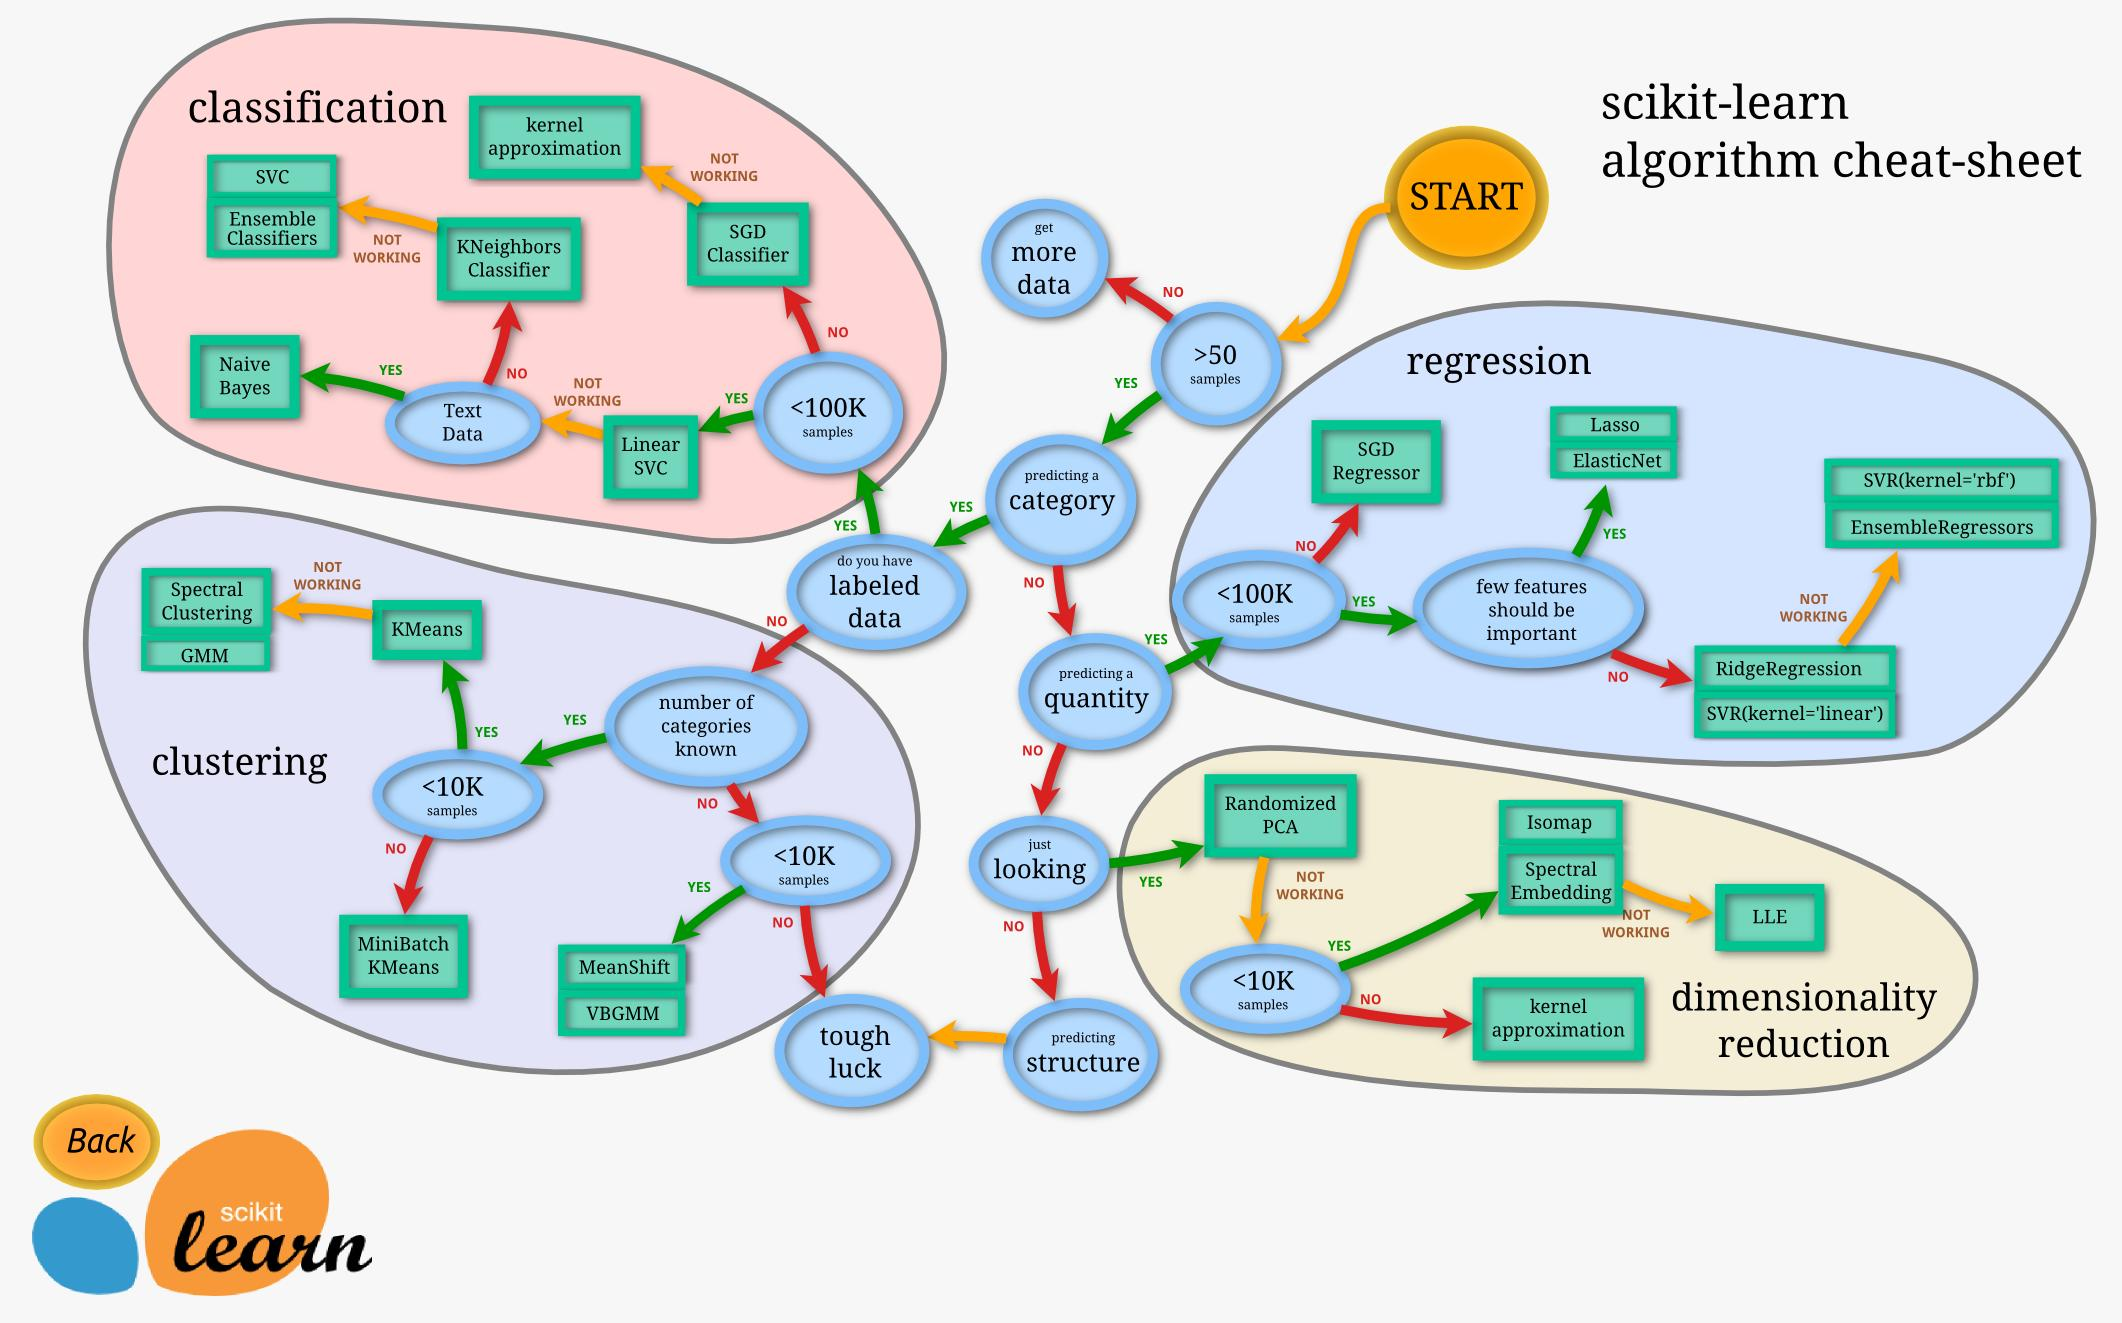

In [5]:
from IPython.display import Image
Image(filename='choose_algoritm.png') 

Согласно схеме:<br>
Нам необходимо предсказать категорию (предсказать, какое действие выполняет человек)<br>
У нас есть размеченные данные<br>
Всего в файле train_l1.csv представленно ~8000 строк кода

Наиболее эффективными должны оказаться методы:<br>
Linear SVC, KNeighbors и SGDClassifier

**SVM**

In [6]:
# Запустим SVM без указания парметров
# По умолчанию будут стоять: С = 1.0, kernel = 'sbf', gamma = 'scale'
#  rbf - Радиальная базисная функция. Эта функция уменьшается в цене, когда она удаляется от центра. (Центр в данном случае является опорным вектором.)
from sklearn import svm
model = svm.SVC()
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.93      0.96      0.94       471
Walking Downstairs       0.99      0.91      0.95       420
           Sitting       0.94      0.89      0.91       491
          Standing       0.91      0.95      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [18]:
# Попробуем изменить парметр С, для получения более высокой точности
from sklearn import svm
from sklearn.metrics import classification_report
for i in range(1,20):
    model = svm.SVC(kernel='rbf', C=i)
    model.fit(train_X, train_y)
    yhat = model.predict(test_X)
    target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
    print(classification_report(test_y, yhat, target_names=target_names))
    print(i)

# После С=4 точность установилась на 96%

                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.93      0.96      0.94       471
Walking Downstairs       0.99      0.91      0.95       420
           Sitting       0.94      0.89      0.91       491
          Standing       0.91      0.95      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

1
                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.93      0.95      0.94       471
Walking Downstairs       0.99      0.92      0.95       420
           Sitting       0.95      0.89      0.92       491
          Standing       0.91      0.95      0.93       532
            Laying       1.00     

KeyboardInterrupt: KeyboardInterrupt: 

In [47]:
# Начиная с С=4 точность повысилась до 96%, попробуем уменьшить шаг настройки и получить точность еще выше
from sklearn import svm
from sklearn.metrics import classification_report
i = 4
while i<5:
    model = svm.SVC(kernel='rbf', C=i)
    model.fit(train_X, train_y)
    yhat = model.predict(test_X)
    target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
    print(classification_report(test_y, yhat, target_names=target_names))
    print(i)
    i+=0.1

# Данная настройка не привела к улучшению результата
# В Случае уменьшения С до значений <1, точность падает до 83%

                    precision    recall  f1-score   support

           Walking       0.95      0.99      0.97       496
  Walking Upstairs       0.93      0.96      0.95       471
Walking Downstairs       0.99      0.92      0.96       420
           Sitting       0.95      0.90      0.92       491
          Standing       0.91      0.96      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.95      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

4
                    precision    recall  f1-score   support

           Walking       0.95      0.99      0.97       496
  Walking Upstairs       0.93      0.96      0.95       471
Walking Downstairs       0.99      0.92      0.96       420
           Sitting       0.95      0.90      0.92       491
          Standing       0.91      0.96      0.93       532
            Laying       1.00     

In [46]:
# Попробуем изменить параметр gamma
from sklearn import svm
model = svm.SVC(kernel='rbf', C=4, gamma='auto')
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

# изменение данного парметра в нашем случае не дало увеличение точности 

                    precision    recall  f1-score   support

           Walking       0.94      0.99      0.97       496
  Walking Upstairs       0.95      0.95      0.95       471
Walking Downstairs       0.99      0.93      0.96       420
           Sitting       0.94      0.89      0.91       491
          Standing       0.91      0.94      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [43]:
# Изменим ядро на kernel='linear' , пробуем разные значения С в диапазоне от 1 до 20
# При использовании линейного ядра классы будут разбиваться прямыми линиями 
from sklearn import svm
model = svm.SVC(kernel='linear', C=4)
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

# Увеличилась скорость работы модели, увеличения точности нет, независимо от измения параметра С точность остается 96%

                    precision    recall  f1-score   support

           Walking       0.96      0.99      0.97       496
  Walking Upstairs       0.98      0.96      0.97       471
Walking Downstairs       0.99      0.98      0.98       420
           Sitting       0.97      0.88      0.92       491
          Standing       0.91      0.97      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



**KNeighbors** <br>
Модели k-NN работают, беря точку данных и рассматривая «k» ближайших помеченных точек данных. Затем точке данных присваивается метка для большинства ближайших точек «k».

In [20]:
# Запускаем модель без указания параметров
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.89      0.90      0.90       471
Walking Downstairs       0.95      0.79      0.86       420
           Sitting       0.91      0.79      0.85       491
          Standing       0.83      0.93      0.88       532
            Laying       1.00      0.99      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947



In [29]:
# Подбираем парметр количества соседей К для повышения точности 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
for i in range(5,15):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    yhat = model.predict(test_X)
    target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
    print(classification_report(test_y, yhat, target_names=target_names))
    print(i)

# При значениях n_neighbors=8 и n_neighbors=9 точность повысилась до 91%
# При увеличении количесва соседей точность осталась на том же уровне

                    precision    recall  f1-score   support

           Walking       0.82      0.99      0.90       496
  Walking Upstairs       0.90      0.91      0.90       471
Walking Downstairs       0.97      0.74      0.84       420
           Sitting       0.91      0.78      0.84       491
          Standing       0.82      0.94      0.88       532
            Laying       1.00      0.99      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.89      0.89      2947
      weighted avg       0.90      0.90      0.90      2947

40
                    precision    recall  f1-score   support

           Walking       0.82      0.99      0.90       496
  Walking Upstairs       0.90      0.91      0.90       471
Walking Downstairs       0.97      0.74      0.84       420
           Sitting       0.92      0.76      0.83       491
          Standing       0.81      0.94      0.87       532
            Laying       1.00    

In [39]:
# Пробуем изменить параметр weights:
# ‘uniform’ - Все точки в каждой окрестности взвешиваются одинаково. Стоит по умолчанию
# ‘distance’ - в этом случае более близкие соседи точки запроса будут оказывать большее влияние, чем соседи, которые находятся дальше
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8, weights='distance')
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

# Изменение данного параметра не повлияло на точность нашей модели

                    precision    recall  f1-score   support

           Walking       0.86      0.97      0.92       496
  Walking Upstairs       0.90      0.90      0.90       471
Walking Downstairs       0.95      0.81      0.88       420
           Sitting       0.91      0.82      0.86       491
          Standing       0.85      0.93      0.89       532
            Laying       1.00      0.99      1.00       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



**SGDClassifier** <br>
Реализует процедуру обучения стохастическим градиентным спуском, которая поддерживает различные функции потерь и штрафы за классификацию. <br>
Отличается от обычного градиентного спуска тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента

In [68]:
# Запускаем без параметров, по умолчанию будут стоять loss='hinge', penalty='l2'
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.96      0.98      0.97       496
  Walking Upstairs       0.98      0.95      0.96       471
Walking Downstairs       0.96      0.98      0.97       420
           Sitting       0.97      0.87      0.92       491
          Standing       0.90      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [70]:
'''
l1 - создает разреженность, 
т.е из всего массива факторов отобрать лишь небольшое количество важнейших, задающих тенденцию, 
и удалить все остальные, являющиеся просто шумом.
l2 - Суть состоит в том, что мы изменяем нашу первоначальную функцию, добавляя «штраф» на большие весовые коэффициенты.
'''

# Запускаем c параметром penalty='l1'
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(penalty='l1')
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
print(classification_report(test_y, yhat, target_names=target_names))

# Точность модели уменьшилась на 1%

                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.96      0.92      0.94       471
Walking Downstairs       0.95      0.96      0.96       420
           Sitting       0.95      0.88      0.92       491
          Standing       0.90      0.96      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [71]:
'''
Функции потерь 
hinge (soft-margin)- линейная машина опорных векторов,
modified_huber -  сглаженная потеря петель,
'''
# Пробуем изменить функцию потерь 
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='modified_huber')
model.fit(train_X, train_y)
yhat = model.predict(test_X)

from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.95      0.98      0.97       496
  Walking Upstairs       0.98      0.94      0.96       471
Walking Downstairs       0.97      0.97      0.97       420
           Sitting       0.96      0.89      0.93       491
          Standing       0.90      0.97      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



# Вывод

SVM без параметров выдает точность 95%, время потрачено на первое выполнение - 8.7сек <br>
SVM c ядром 'rbf' достигает максимальной точности 96% при С=4<br>
SVM c ядром 'linear' достигает максимальной точности 96% независимо от параметра С,  при этом скорость первого выполнения составляет 2 сек <br>
K-NN без параметров выдает точность 90%, время выполнения алгоритма составило 1.5 сек <br>
K-NN выдает максимальную точность 91%, что незначительно отличается от исходной точности <br>
SGD показывает точность 96%,в нашем случае при усиановке парметра штрафа penalty='l1' увеличивается время обучения модели с потерей точности. Изменение функций потерь не принесло значительных изменений

# Вопросы

**В чем разница между показателями precision и recall?** <br>
Precision - Представляет собой отношение числа семплов, верно классифицированных как указанный нами класс, к общему числу выборок с меткой нашего класса (распознанных правильно и неправильно).Демонстрирует способность отличать этот класс от других классов <br>
Recall - рассчитывается как отношение числа правильных определений нашего класса , к общему количеству семплов нашего класса, т.е не зависит от ложных определений другого класса как нашего. Демонстрирует способность алгоритма обнаруживать данный класс <br>
**Что такое показатель F1?**<br>
В том случае, если Precision и Recall являются одинаково значимыми, мы  использовуем  их среднее гармоническое (F1-Score) для получения оценки результатов. Значение меняется в промежутке от 0 до 1, чем выше значение, тем лучше соотношение запоминания и точности модели.